In [4]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(filepath):
    """Laadt de dataset en verwijdert rijen met missende gegevens."""
    data = pd.read_csv(filepath)
    cleaned_data = data.dropna()
    return cleaned_data

def main():
    # Pad naar je dataset
    filepath = 'https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv'
    
    # Data laden en schoonmaken
    data = load_and_clean_data(filepath)
    
    # Print een voorbeeld van de data
    print(data.head())

if __name__ == "__main__":
    main()

   transaction_id transaction_date transaction_time  transaction_qty  \
1               2       03/13/2023         19:46:25                1   
2               3       03/18/2023         09:00:53                1   
3               4       03/16/2023         11:16:47                2   
4               5       03/18/2023         17:00:22                1   
6               7       03/13/2023         10:15:55                3   

   store_id store_location  unit_price product_category   product_type  
1       2.0        Utrecht         4.5        Chocolate  Hot chocolate  
2       3.0          Breda         3.0              Tea      Black tea  
3       2.0        Utrecht         3.0           Bakery          Scone  
4       3.0          Breda         4.5        Chocolate  Hot chocolate  
6       1.0      Amsterdam         3.5           Bakery            Pie  


In [9]:
def calculate_probability_more_than_two_items(data):
    # Bereken het totale aantal transacties
    total_transactions = len(data)
    
    # Identificeer transacties met meer dan 2 items en tel ze
    transactions_more_than_two_items = len(data[data['transaction_qty'] > 2])
    
    # Bereken de kans
    probability = transactions_more_than_two_items / total_transactions
    
    return probability

def main():
    # Pad naar je dataset
    filepath = 'https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv'
    
    # Data laden en schoonmaken
    data = load_and_clean_data(filepath)
    
    # Bereken de kans
    probability = calculate_probability_more_than_two_items(data)
    
    print(f"De kans dat een transactie meer dan 2 items bevat is {probability:.2%}.")

if __name__ == "__main__":
    main()


De kans dat een transactie meer dan 2 items bevat is 20.16%.


Beschrijvende Statistieken en Scheefheid per Producttype:
              product_type   count  mean           std   min   25%   50%  \
0             Black coffee   448.0  2.00  0.000000e+00  2.00  2.00  2.00   
1                Black tea   469.0  3.00  0.000000e+00  3.00  3.00  3.00   
2                 Chai tea   456.0  3.25  0.000000e+00  3.25  3.25  3.25   
3                Green tea   438.0  3.15  8.891941e-16  3.15  3.15  3.15   
4               Herbal tea   437.0  3.50  0.000000e+00  3.50  3.50  3.50   
5            Hot chocolate  1780.0  4.50  0.000000e+00  4.50  4.50  4.50   
6              Milk coffee   474.0  3.50  0.000000e+00  3.50  3.50  3.50   
7   Organic blended coffee   472.0  6.30  1.778242e-15  6.30  6.30  6.30   
8                      Pie   604.0  3.50  0.000000e+00  3.50  3.50  3.50   
9                 Sandwich   606.0  3.75  0.000000e+00  3.75  3.75  3.75   
10                   Scone   598.0  3.00  0.000000e+00  3.00  3.00  3.00   
11            Syrup coffee   4

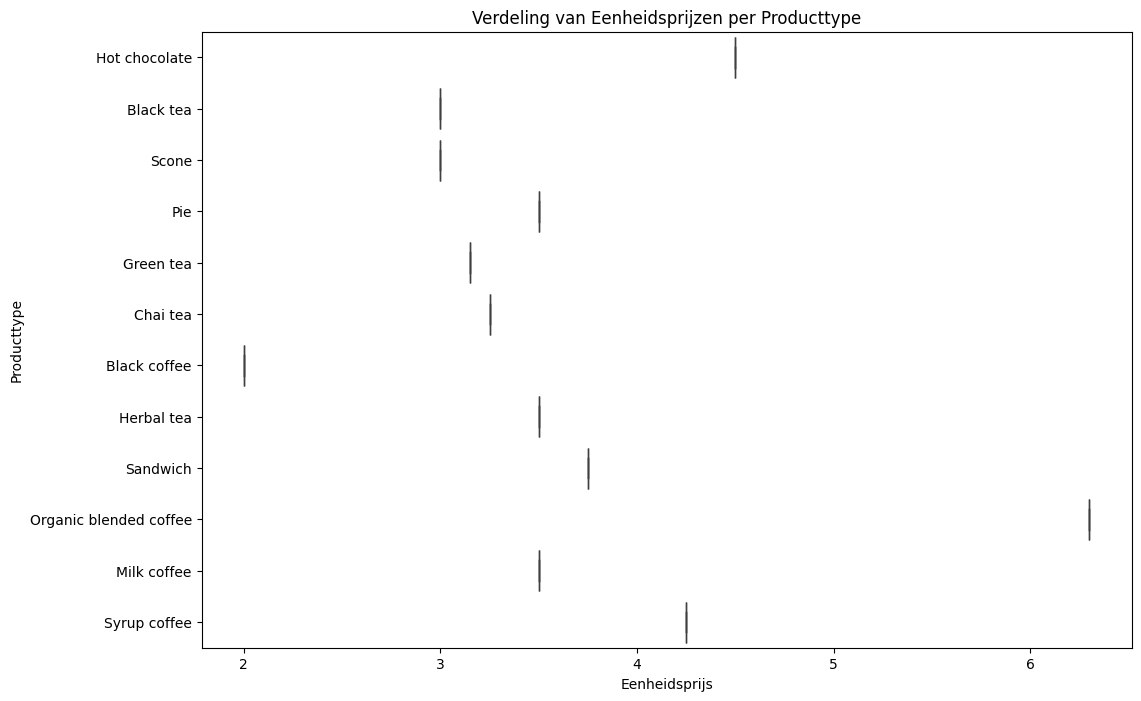

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_unit_price_variation(data):
    # Beschrijvende statistieken per producttype
    descriptive_stats = data.groupby('product_type')['unit_price'].describe()
    
    # Scheefheid per producttype
    skewness = data.groupby('product_type')['unit_price'].skew().reset_index(name='Skewness')
    
    # Combineer beschrijvende statistieken en scheefheid
    combined_stats = descriptive_stats.merge(skewness, on='product_type')
    
    print("Beschrijvende Statistieken en Scheefheid per Producttype:")
    print(combined_stats)
    
    # Visualisatie met boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='unit_price', y='product_type', data=data)
    plt.title('Verdeling van Eenheidsprijzen per Producttype')
    plt.xlabel('Eenheidsprijs')
    plt.ylabel('Producttype')
    plt.show()

def main():
    # Pad naar je dataset
    filepath = 'https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv'
    
    # Data laden en schoonmaken
    data = pd.read_csv(filepath)
    cleaned_data = data.dropna()
    
    # Analyseer de variatie in eenheidsprijs
    analyze_unit_price_variation(cleaned_data)

if __name__ == "__main__":
    main()

In [19]:
import pandas as pd
import numpy as np
from scipy import stats

def calculate_average_revenue_and_confidence_interval(data):
    # Bereken de totale omzet per transactie
    data['revenue'] = data['transaction_qty'] * data['unit_price']
    
    # Bereken het gemiddelde van deze omzet
    average_revenue = data['revenue'].mean()
    
    # Bereken het 95% vertrouwensinterval voor het gemiddelde
    confidence_interval = stats.t.interval(0.95, len(data['revenue'])-1, loc=np.mean(data['revenue']), scale=stats.sem(data['revenue']))
    
    return average_revenue, confidence_interval

def main():
    # Pad naar je dataset
    filepath = 'https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv'
    
    # Data laden en schoonmaken
    data = pd.read_csv(filepath)
    cleaned_data = data.dropna()
    
    # Bereken gemiddelde omzet en vertrouwensinterval
    average_revenue, confidence_interval = calculate_average_revenue_and_confidence_interval(cleaned_data)
    
    print(f"De gemiddelde omzet per transactie is: {average_revenue:.2f} EUR.")
    print(f"Het 95% vertrouwensinterval voor de gemiddelde omzet per transactie ligt tussen {confidence_interval[0]:.2f} EUR en {confidence_interval[1]:.2f} EUR.")

if __name__ == "__main__":
    main()




De gemiddelde omzet per transactie is: 7.60 EUR.
Het 95% vertrouwensinterval voor de gemiddelde omzet per transactie ligt tussen 7.48 EUR en 7.71 EUR.


/tmp/ipykernel_13021/2299165882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['revenue'] = data['transaction_qty'] * data['unit_price']


In [21]:
import pandas as pd

def calculate_revenue(data):
    data['revenue'] = data['transaction_qty'] * data['unit_price']
    return data

def main():
    # Load your data into a DataFrame
    data = pd.read_csv('https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv')  # Make sure to replace 'your_file.csv' with your actual file path

    # Clean the data if needed (e.g., handle missing values)
    data.dropna(inplace=True)  # This will drop rows with missing values

    # Calculate revenue
    data = calculate_revenue(data)

    # Compute descriptive statistics
    avg_revenue = data['revenue'].mean()
    std_revenue = data['revenue'].std()

    # Compute 95% confidence interval for average revenue per transaction
    confidence_interval = stats.norm.interval(0.95, loc=avg_revenue, scale=std_revenue/len(data)**0.5)

    # Print results
    print(f"The average revenue per transaction is: {avg_revenue:.2f} EUR.")
    print(f"The 95% confidence interval for the average revenue per transaction is between {confidence_interval[0]:.2f} EUR and {confidence_interval[1]:.2f} EUR.")

if __name__ == "__main__":
    main()


The average revenue per transaction is: 7.60 EUR.
The 95% confidence interval for the average revenue per transaction is between 7.48 EUR and 7.71 EUR.


In [25]:
from scipy.stats import ttest_ind

# Stap 5: Formuleer de hypothese
# Null Hypothese: Er is geen significant verschil in omzet tussen productcategorieën
# Alternatieve Hypothese: Er is een significant verschil in omzet tussen productcategorieën

# Stap 6: Voer de t-toets uit
category_A_revenue = data[data['product_category'] == 'Category A']['revenue']
category_B_revenue = data[data['product_category'] == 'Category B']['revenue']

t_statistic, p_value = ttest_ind(category_A_revenue, category_B_revenue)

# Stap 7: Interpretatie van resultaten
alpha = 0.05
if p_value < alpha:
    print("We verwerpen de nulhypothese. Er is een significant verschil in omzet tussen productcategorieën.")
else:
    print("We behouden de nulhypothese. Er is geen significant verschil in omzet tussen productcategorieën.")



KeyError: 'revenue'